# Lab 11: Sorting

## <font color=DarkRed>Your Exercise: Analyse Sorting Algorithms.</font>

Using random number generation (as I have done in class) use timing analysis to compare Bubblesort, InsertionSort, Selectionsort, Shellsort, Mergesort, Quicksort.

This will require lists larger than 500 to get good timings. Adjust for your computer's capabilities. Provide meaningful plots of these results using Matplotlib.

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

In [106]:
# Import library
import random
from random import choices
import copy
import timeit
import pandas as pd
import matplotlib.pyplot as plt

testList = random.sample(range(100), 5)

In [98]:
def bubbleSort(unsortlist):
    '''
    Perform bubble sort on an unordered list of numbers.
    
    Signature: Kefu Zhu
    '''
    # Make a deep copy of original list
    alist = copy.deepcopy(unsortlist)
    
    # Initialize a boolean variable to track whether any swap operation has been doen to the rest of list 
    swap = True
    # Initialize the boundary for sorting
    rest_num = len(alist) - 1
    # When there is at least one swap operation (the rest list is unsorted) and the boundary is still valid
    while swap and rest_num > 0:
        # Loop through every element in the rest list
        for i in range(rest_num):
            # Compare the adjacent elements, swap the larger one toward the end of the list
            if alist[i] > alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
        
        # Decrement the boundary counter
        rest_num -= 1
    
    return alist

In [108]:
# Test the funtionality of bubble sort
print("Original List: {}".format(testList))
print("Sorted List: {}".format(bubbleSort(testList)))

Original List: [14, 36, 23, 65, 61]
Sorted List: [14, 23, 36, 61, 65]


In [99]:
def insertionSort(unsortlist):
    '''
    Perform in-place insertion sort on an unsorted list of random numbers.
    
    Signature: Kefu Zhu
    '''
    # Make a deep copy of original list
    alist = copy.deepcopy(unsortlist)
    
    # Loop through the list starting from position 1 (2nd element)
    for index in range(1, len(alist)):
        # Starting position
        position = index
        # Current value
        current = alist[index]
        
        # If the current position is valid and the element before this position is greater than the current value
        while position > 0 and alist[position-1] > current:
            # Move the element before the position forward one step (Override the "position" element with "position-1" element)
            alist[position] = alist[position-1]
            # Decrement the position by 1
            position -= 1
        
        # Reposition the current value to correct position
        alist[position] = current
    
    return alist

In [109]:
# Test the funtionality of selection sort
print("Original List: {}".format(testList))
print("Sorted List: {}".format(insertionSort(testList)))

Original List: [14, 36, 23, 65, 61]
Sorted List: [14, 23, 36, 61, 65]


In [100]:
def selectionSort(unsortlist):
    '''
    Perform in-place selection sort on an unsorted list of random numbers.
    
    Signature: Kefu Zhu
    '''
    # Make a deep copy of original list
    alist = copy.deepcopy(unsortlist)
    
    # Index to fill the largest element found for the rest of the list 
    # (We are finding largest element in each iteration and put it to the end of the list)
    for i in range(len(alist)-1,0,-1):
        # Initialize the default index of the largest element (Just pick the first element)
        _max = 0
        # Go through the rest of unsorted list and do pairwise comparison between the current value and the largest value found before
        for j in range(1,i+1):
            # If the current value is larger than the previous largest value
            if alist[j] > alist[_max]:
                # Set the current index to the index of the largest element
                _max = j
        # Swap the largest value and the last element in the unsorted part of the list
        temp = alist[i]
        alist[i] = alist[_max]
        alist[_max] = temp
    
    return alist

In [110]:
# Test the funtionality of selection sort
print("Original List: {}".format(testList))
print("Sorted List: {}".format(selectionSort(testList)))

Original List: [14, 36, 23, 65, 61]
Sorted List: [14, 23, 36, 61, 65]


In [101]:
def shellSort(unsortlist):
    '''
    Perform shell sort on a list of random numbers
    
    Signature: Kefu Zhu
    '''
    
    # Make a deep copy of original list
    alist = copy.deepcopy(unsortlist)
 
    # Start with a big gap, then reduce the gap
    n = len(alist)
    # Choose the initial gap size
    gap = n//2
 
    # When gap size is valid, perform the insertion sort on each sublist
    while gap > 0:
        # Normal insertion sort starting from here
        for index in range(gap,n):
 
            # save a[index] in temp and make a hole at position index
            temp = alist[index]
 
            # shift earlier gap-sorted elements up until the correct
            position = index
            while  position >= gap and alist[position-gap] >temp:
                alist[position] = alist[position-gap]
                position -= gap
 
            # put temp (the original a[index]) in its correct location
            alist[position] = temp
        
        # End of current insertion sort
        
        # Reduce the gap size
        gap //= 2
        
    return alist

In [111]:
# Test the funtionality of selection sort
print("Original List: {}".format(testList))
print("Sorted List: {}".format(shellSort(testList)))

Original List: [14, 36, 23, 65, 61]
Sorted List: [14, 23, 36, 61, 65]


In [116]:
def mergeSort(unsortlist):
    '''
    Perform merge sort on a list of random numbers
    
    Signature: Kefu Zhu
    '''
    
    # Make a deep copy of original list
    alist = copy.deepcopy(unsortlist)
    
    # When the list length does not reach the base case scenario (Base case is we have sublist of length 1)
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        # Recursively call merge sort on left sublist and right sublist
        # (continue breaking down sublist into smaller sublists, until the sublist only contain 1 element)
        mergeSort(lefthalf)
        mergeSort(righthalf)
        
        i = 0 # Index for left sublist
        j = 0 # Index for right sublist
        k = 0 # Index for original list
        
        # ** MERGE **
        
        # Merge the left sublist and right sublist
        while i < len(lefthalf) and j < len(righthalf):
            # If the current value in left sublist is smaller than the current value in right sublist
            if lefthalf[i] < righthalf[j]:
                # Put the value from left sublist into the correct kth position in original list
                alist[k] = lefthalf[i]
                # Increment the index pointer (i) for left sublist
                i = i + 1
            # If the current value in right sublist is smaller than or equal to the current value in left sublist
            else:
                # Put the value from right sublist into the correct kth position in original list
                alist[k] = righthalf[j]
                # Increment the index pointer (j) for right sublist
                j = j + 1
            # Increment the index pointer (k) for the original list
            k = k + 1
        
        # When the above while loop is done, it means that all items from one of the sublist (left or right) have been put
        # into the correct position in the original list
        
        # Therefore, start putting the rest of the items from the non-empty sublist (left or right) into the original list one by one
        
        # Left list is not empty
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
            
        # Right list is not empty
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1
    
    return alist

In [117]:
# Test the funtionality of selection sort
print("Original List: {}".format(testList))
print("Sorted List: {}".format(shellSort(testList)))

Original List: [14, 36, 23, 65, 61]
Sorted List: [14, 23, 36, 61, 65]


In [119]:
# Time of repetitive evaluation
test_times = 10
# Create different size for testing
test_runs = range(1000,10000,1000)
# Create an empty dataframe to store test results, use the size of each test object as index
test_results = pd.DataFrame(columns = ['BubbleSort','InsertionSort','SelectionSort','ShellSort','MergeSort'], index = test_runs)
# Create different size of lists and dictionaries for evaluations
for size in test_runs:
    # Create a list of random numbers, prepare for evaluation
    lst = [random.random() for i in range(size)]
    # Timer object for each sorting algorithm
    bubble_t = timeit.Timer("bubbleSort(alist)", globals={"bubbleSort": bubbleSort, "alist": lst})
    insertion_t = timeit.Timer("insertionSort(alist)", globals={"insertionSort": insertionSort, "alist": lst})
    selection_t = timeit.Timer("selectionSort(alist)", globals={"selectionSort": selectionSort, "alist": lst})
    shell_t = timeit.Timer("shellSort(alist)", globals={"shellSort": shellSort, "alist": lst})
    merge_t = timeit.Timer("mergeSort(alist)", globals={"mergeSort": mergeSort, "alist": lst})
    
    # Evaluate each sorting algorithm runtime and store the result into dataframe
    test_results['BubbleSort'][size] = bubble_t.timeit(test_times)
    test_results['InsertionSort'][size] = insertion_t.timeit(test_times)
    test_results['SelectionSort'][size] = selection_t.timeit(test_times)
    test_results['ShellSort'][size] = shell_t.timeit(test_times)
    test_results['MergeSort'][size] = merge_t.timeit(test_times)
    print("Runtime test on list size of {} is done.".format(size))

Runtime test on list size of 1000 is done.
Runtime test on list size of 2000 is done.
Runtime test on list size of 3000 is done.
Runtime test on list size of 4000 is done.
Runtime test on list size of 5000 is done.
Runtime test on list size of 6000 is done.
Runtime test on list size of 7000 is done.
Runtime test on list size of 8000 is done.
Runtime test on list size of 9000 is done.


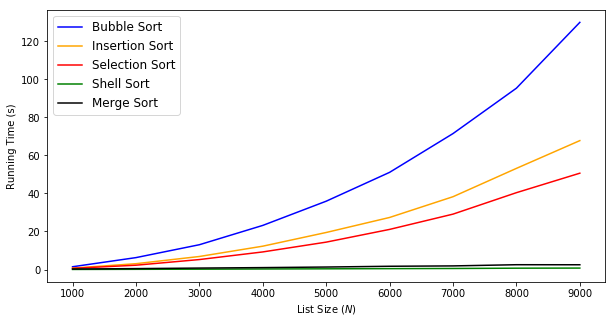

In [120]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(test_results.index,test_results['BubbleSort'], label='Bubble Sort', color='blue')
ax.plot(test_results.index,test_results['InsertionSort'], label='Insertion Sort', color='orange')
ax.plot(test_results.index,test_results['SelectionSort'], label='Selection Sort', color='red')
ax.plot(test_results.index,test_results['ShellSort'], label='Shell Sort', color='green')
ax.plot(test_results.index,test_results['MergeSort'], label='Merge Sort', color='black')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

Both `Merge Sort` and `Shell Sort` seems to have constant close to zero runtime on the graph above. The reason is because the runtime of other algorithms escalate too fast as the list size $(N)$ increases. So the scale becomes too large for the runtime of `Merge Sort` and `Shell Sort`

Now we only graph the runtime of `Merge Sort` and `Shell Sort`

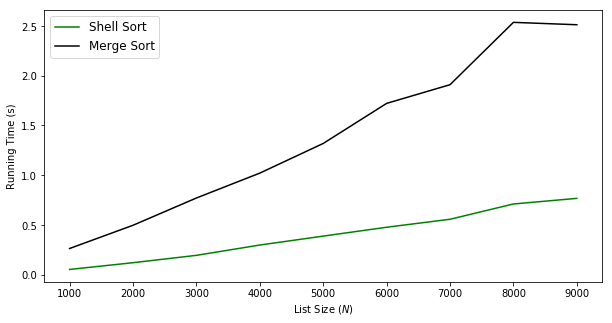

In [121]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("List Size ($N$)")
# Add test results
ax.plot(test_results.index,test_results['ShellSort'], label='Shell Sort', color='green')
ax.plot(test_results.index,test_results['MergeSort'], label='Merge Sort', color='black')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

**Conclusion**: It is clear to see that `Bubble Sort`, `Selection Sort` and `Insertion Sort` become very inefficient at sorting as the size of the list need to be sorted increases. While `Merge Sort` and `Shell Sort` have relative better performance compared to them.